In [1]:
import numpy as np
from scipy.special import erfinv, erf
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
2+2

4

### Find 'non-random' numbers from the Gaussian distribution

In [3]:
num_types = 512
y = np.linspace(-1.0, 1.0, num=num_types**2+2)
x = erfinv(y)*2**.5

In [4]:
# remove endpoints
print(x[0:2], x[-2:])
q = x[1:-1]
print(q[0:2], q[-2:])

[       -inf -4.47532924] [4.47532924        inf]
[-4.47532924 -4.32491988] [4.32491988 4.47532924]


### Plot distribution, together with Gaussian

dE=0.0111883230991352


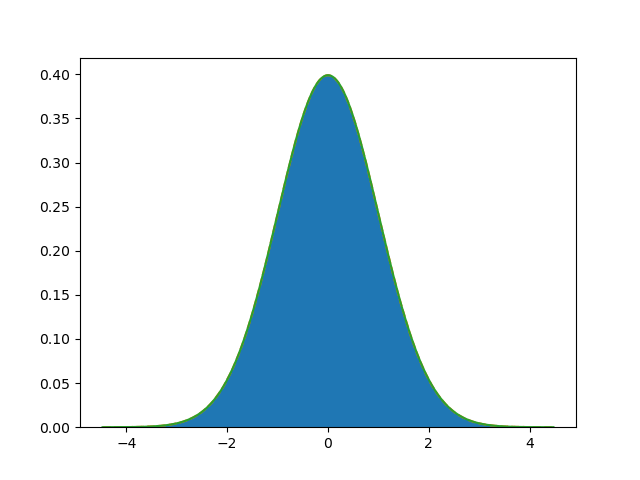

In [5]:
plt.figure()
#plt.hist(q, bins=400, density=True)
n, bins, patches = plt.hist(q, bins=400, density=True)
dE = (bins[1]-bins[0])/2
print(f'{dE=}')
E = bins[:-1]+dE
plt.plot(E, n, '--')

sigma = 1
plt.plot(q, (2*np.pi*sigma**2)**-.5*np.exp(-q**2/(2*sigma**2)))

plt.show()

### Find the distribution of energies in canonical ensemble 

Note: depends on dE, which depends on bins

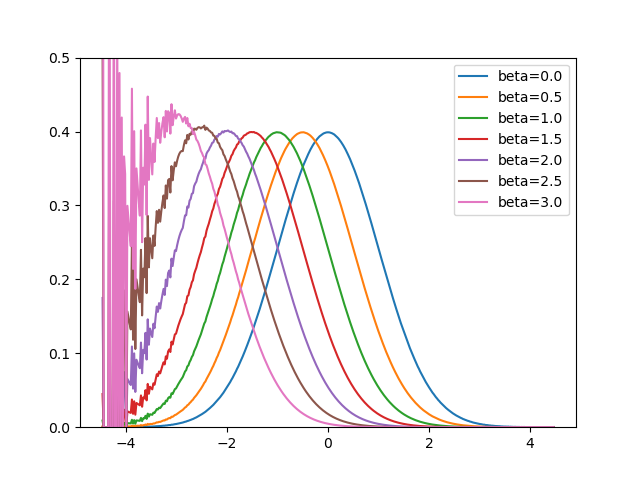

In [6]:
plt.figure()
for beta in [0., 0.5, 1., 1.5, 2.0, 2.5, 3.0]:
    pE = n*np.exp(-beta*E)/np.sum(n*np.exp(-beta*E))
    plt.plot(E, pE/(E[1]-E[0]), label=f'{beta=}')
plt.ylim([0., 0.5])
plt.legend()
plt.show()

### Add 'orientation' of atom/molecule to increase number of interactions
... and remove dependency on binning in analysis

In [7]:
num_types = 512
num_orientations = [1, 2, 4, 8, 16, 32]
betas = np.arange(0,7,.5)

mE = np.zeros((len(num_orientations), len(betas)))

for j, orientations in enumerate(num_orientations):
    num_interactions = num=(num_types * orientations)**2    
    print(f'{orientations=}, {num_interactions=:.2e}')
    E = (erfinv(np.linspace(-1.0, 1.0, num=num_interactions+2))*2**.5)[1:-1]
    for i, beta in enumerate(betas):
        mE[j, i] = np.sum(E*np.exp(-beta*E)/np.sum(np.exp(-beta*E)))


orientations=1, num_interactions=2.62e+05
orientations=2, num_interactions=1.05e+06
orientations=4, num_interactions=4.19e+06
orientations=8, num_interactions=1.68e+07
orientations=16, num_interactions=6.71e+07
orientations=32, num_interactions=2.68e+08


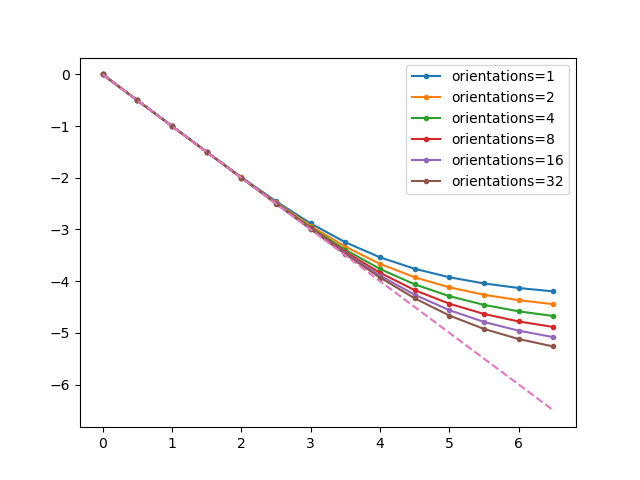

In [8]:
plt.figure()
for j, orientations in enumerate(num_orientations):
    plt.plot(betas, mE[j,:], '.-', label=f'{orientations=}')
plt.plot(betas, -betas, '--')
plt.legend()
plt.show()